# Requirements

In [ ]:
import pandas as pd

In [17]:
# Add as many imports as you need.
# Write your code here. Add as many boxes as you need.

# Add as many imports as you need.
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense
import keras

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **count of page loads**. Your task involves employing bagging and boosting methods to forecast the **count of page loads**. To accomplish this, you will use data from the preceding three days, consisting of **count of page loads**, **count of unique visits**, **count of first time-visits**, **count of returning visits**, and the current **day**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Website Visitors Dataset

## Downloading the Website Visitors Dataset

In [ ]:
!gdown 1h1P3NboXKbWNngqgCB1i4bHFRcv7uDJe # Download the dataset.

## Exploring the Website Visitors Dataset
This datatset consists of daily counts of page loads, unique visitors, first-time visitors, and returning visitors for an academic teaching notes website. The dataset contains 2167 rows spanning from September 14, 2014, to August 19, 2020. A visit is defined as a series of hits on one or more pages by the same user on a given day, identified by IP address. Shared IP addresses are considered a single user. A visit is "unique" if a hit from the same IP address hasn't occurred within the last 6 hours. Returning visitors are identified by cookies, and the rest are classified as first-time visitors. The unique visitor count is the sum of returning and first-time visitors.

The dataset consists of the following columns:
- date - date in mm/dd/yyyy format,
- day_of_week - day of the week in text form (Monday, Tuesday, etc.),
- page_loads - daily number of pages loaded,
- unique_visits - daily number of visitors from IP addresses with no hits in over 6 hours,
- first_time_visits - number of unique visitors without a identifying cookie, and
- returning_visits - number of unique visitors minus first-time visitors.

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [3]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("../data/website-visitors.csv")

In [4]:
df

,date,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
0,9/14/2014,Sunday,2.146,1.582,1.430,152.0
1,9/15/2014,Monday,3.621,2.528,2.297,231.0
2,9/16/2014,Tuesday,3.698,2.630,2.352,278.0
3,9/17/2014,Wednesday,3.667,2.614,2.327,287.0
4,9/18/2014,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...,...
2162,8/15/2020,Saturday,2.221,1.696,1.373,323.0
2163,8/16/2020,Sunday,2.724,2.037,1.686,351.0
2164,8/17/2020,Monday,3.456,2.638,2.181,457.0
2165,8/18/2020,Tuesday,3.581,2.683,2.184,499.0


In [5]:
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,date,0,0.0,2167
1,day_of_week,0,0.0,2167
2,page_loads,0,0.0,2167
3,unique_visits,0,0.0,2167
4,first_time_visits,0,0.0,2167
5,returning_visits,0,0.0,2167


In [6]:
df_1 = to_time_series(df, time_feature="date", auto_sort=True)

In [7]:
df_1

,day_of_week,page_loads,unique_visits,first_time_visits,returning_visits
date,,,,,
2014-09-14,Sunday,2.146,1.582,1.430,152.0
2014-09-15,Monday,3.621,2.528,2.297,231.0
2014-09-16,Tuesday,3.698,2.630,2.352,278.0
2014-09-17,Wednesday,3.667,2.614,2.327,287.0
2014-09-18,Thursday,3.316,2.366,2.130,236.0
...,...,...,...,...,...
2020-08-15,Saturday,2.221,1.696,1.373,323.0
2020-08-16,Sunday,2.724,2.037,1.686,351.0
2020-08-17,Monday,3.456,2.638,2.181,457.0


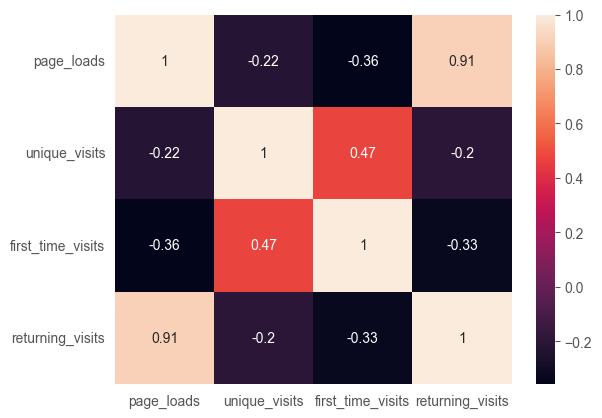

In [8]:
correlation_map(df_1[get_numerical_features_names(df_1)])

Explore the dataset using visualizations of your choice.

<Axes: >

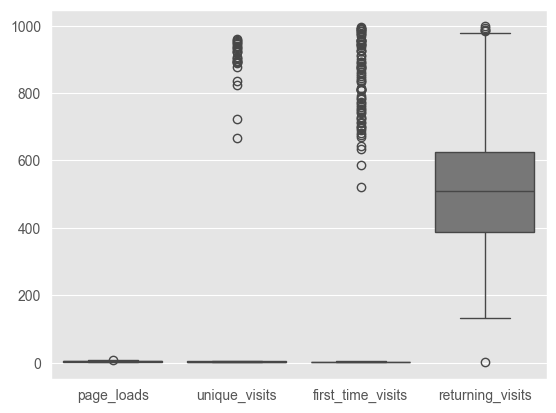

In [11]:
sns.boxplot(df_1)

<Axes: ylabel='first_time_visits'>

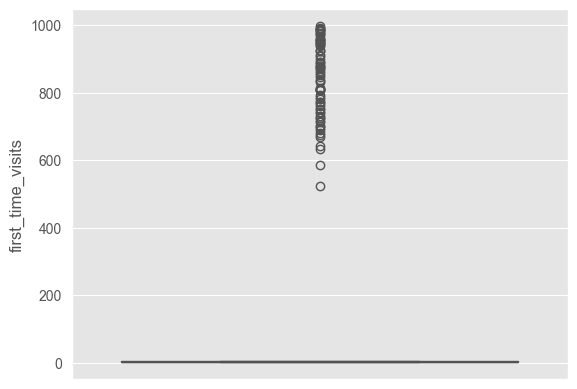

In [10]:
# Write your code here. Add as many boxes as you need.
sns.boxplot(df_1["first_time_visits"])

In [24]:
num_features = get_numerical_features_names(df_1)

Encode the categorical features.

In [25]:
# Write your code here. Add as many boxes as you need.
df_2 = encode_data(df_1, features_to_encode=["day_of_week"], strategy="onehot")

D:\Fax\LAIP\VNP\packages\vnp_ez\__init__.py:146: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  feature_flags = feature_flags.replace(False, 0)


In [26]:
df_2

,page_loads,unique_visits,first_time_visits,returning_visits,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
date,,,,,,,,,,,
2014-09-14,2.146,1.582,1.430,152.0,0,0,0,1,0,0,0
2014-09-15,3.621,2.528,2.297,231.0,0,1,0,0,0,0,0
2014-09-16,3.698,2.630,2.352,278.0,0,0,0,0,0,1,0
2014-09-17,3.667,2.614,2.327,287.0,0,0,0,0,0,0,1
2014-09-18,3.316,2.366,2.130,236.0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2.221,1.696,1.373,323.0,0,0,1,0,0,0,0
2020-08-16,2.724,2.037,1.686,351.0,0,0,0,1,0,0,0
2020-08-17,3.456,2.638,2.181,457.0,0,1,0,0,0,0,0


# Feauture Extraction
Apply a lag of one, two, and three days to each chosen feature (except `day_of_week`), creating a set of features representing the statistics from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [28]:
num_features

['page_loads', 'unique_visits', 'first_time_visits', 'returning_visits']

In [29]:
# Write your code here. Add as many boxes as you need.

df_3 = auto_shift(df_2, lag=3,features_to_shift=num_features ,auto_drop_na=True, return_features=False)

In [30]:
df_3

,page_loads,unique_visits,first_time_visits,returning_visits,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,...,page_loads_prev_1,unique_visits_prev_3,unique_visits_prev_2,unique_visits_prev_1,first_time_visits_prev_3,first_time_visits_prev_2,first_time_visits_prev_1,returning_visits_prev_3,returning_visits_prev_2,returning_visits_prev_1
date,,,,,,,,,,,,,,,,,,,,,
2014-09-17,3.667,2.614,2.327,287.0,0,0,0,0,0,0,...,3.698,1.582,2.528,2.630,1.430,2.297,2.352,152.0,231.0,278.0
2014-09-18,3.316,2.366,2.130,236.0,0,0,0,0,1,0,...,3.667,2.528,2.630,2.614,2.297,2.352,2.327,231.0,278.0,287.0
2014-09-19,2.815,1.863,1.622,241.0,1,0,0,0,0,0,...,3.316,2.630,2.614,2.366,2.352,2.327,2.130,278.0,287.0,236.0
2014-09-20,1.658,1.118,985.000,133.0,0,0,1,0,0,0,...,2.815,2.614,2.366,1.863,2.327,2.130,1.622,287.0,236.0,241.0
2014-09-21,2.288,1.656,1.481,175.0,0,0,0,1,0,0,...,1.658,2.366,1.863,1.118,2.130,1.622,985.000,236.0,241.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2.221,1.696,1.373,323.0,0,0,1,0,0,0,...,2.971,2.904,2.780,2.308,2.477,2.322,1.922,427.0,458.0,386.0
2020-08-16,2.724,2.037,1.686,351.0,0,0,0,1,0,0,...,2.221,2.780,2.308,1.696,2.322,1.922,1.373,458.0,386.0,323.0
2020-08-17,3.456,2.638,2.181,457.0,0,1,0,0,0,0,...,2.724,2.308,1.696,2.037,1.922,1.373,1.686,386.0,323.0,351.0


In [32]:
df_4 = df_3.drop(columns=[ "unique_visits", "first_time_visits", "returning_visits"])

In [33]:
df_4

,page_loads,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,page_loads_prev_3,page_loads_prev_2,page_loads_prev_1,unique_visits_prev_3,unique_visits_prev_2,unique_visits_prev_1,first_time_visits_prev_3,first_time_visits_prev_2,first_time_visits_prev_1,returning_visits_prev_3,returning_visits_prev_2,returning_visits_prev_1
date,,,,,,,,,,,,,,,,,,,,
2014-09-17,3.667,0,0,0,0,0,0,1,2.146,3.621,3.698,1.582,2.528,2.630,1.430,2.297,2.352,152.0,231.0,278.0
2014-09-18,3.316,0,0,0,0,1,0,0,3.621,3.698,3.667,2.528,2.630,2.614,2.297,2.352,2.327,231.0,278.0,287.0
2014-09-19,2.815,1,0,0,0,0,0,0,3.698,3.667,3.316,2.630,2.614,2.366,2.352,2.327,2.130,278.0,287.0,236.0
2014-09-20,1.658,0,0,1,0,0,0,0,3.667,3.316,2.815,2.614,2.366,1.863,2.327,2.130,1.622,287.0,236.0,241.0
2014-09-21,2.288,0,0,0,1,0,0,0,3.316,2.815,1.658,2.366,1.863,1.118,2.130,1.622,985.000,236.0,241.0,133.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-15,2.221,0,0,1,0,0,0,0,3.767,3.621,2.971,2.904,2.780,2.308,2.477,2.322,1.922,427.0,458.0,386.0
2020-08-16,2.724,0,0,0,1,0,0,0,3.621,2.971,2.221,2.780,2.308,1.696,2.322,1.922,1.373,458.0,386.0,323.0
2020-08-17,3.456,0,1,0,0,0,0,0,2.971,2.221,2.724,2.308,1.696,2.037,1.922,1.373,1.686,386.0,323.0,351.0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [34]:
# Write your code here. Add as many boxes as you need.
x,y = get_x_and_y(df_4, target_column="page_loads")

In [35]:
x_train,x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [36]:
# Write your code here. Add as many boxes as you need.
model = XGBRegressor()

In [37]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
predict = model.predict(x_test)

In [39]:
regression_report(y_test, predict)

Regression Report:
Mean Square Error: 0.1729694139495708
R2 Score: 0.8768487603000923


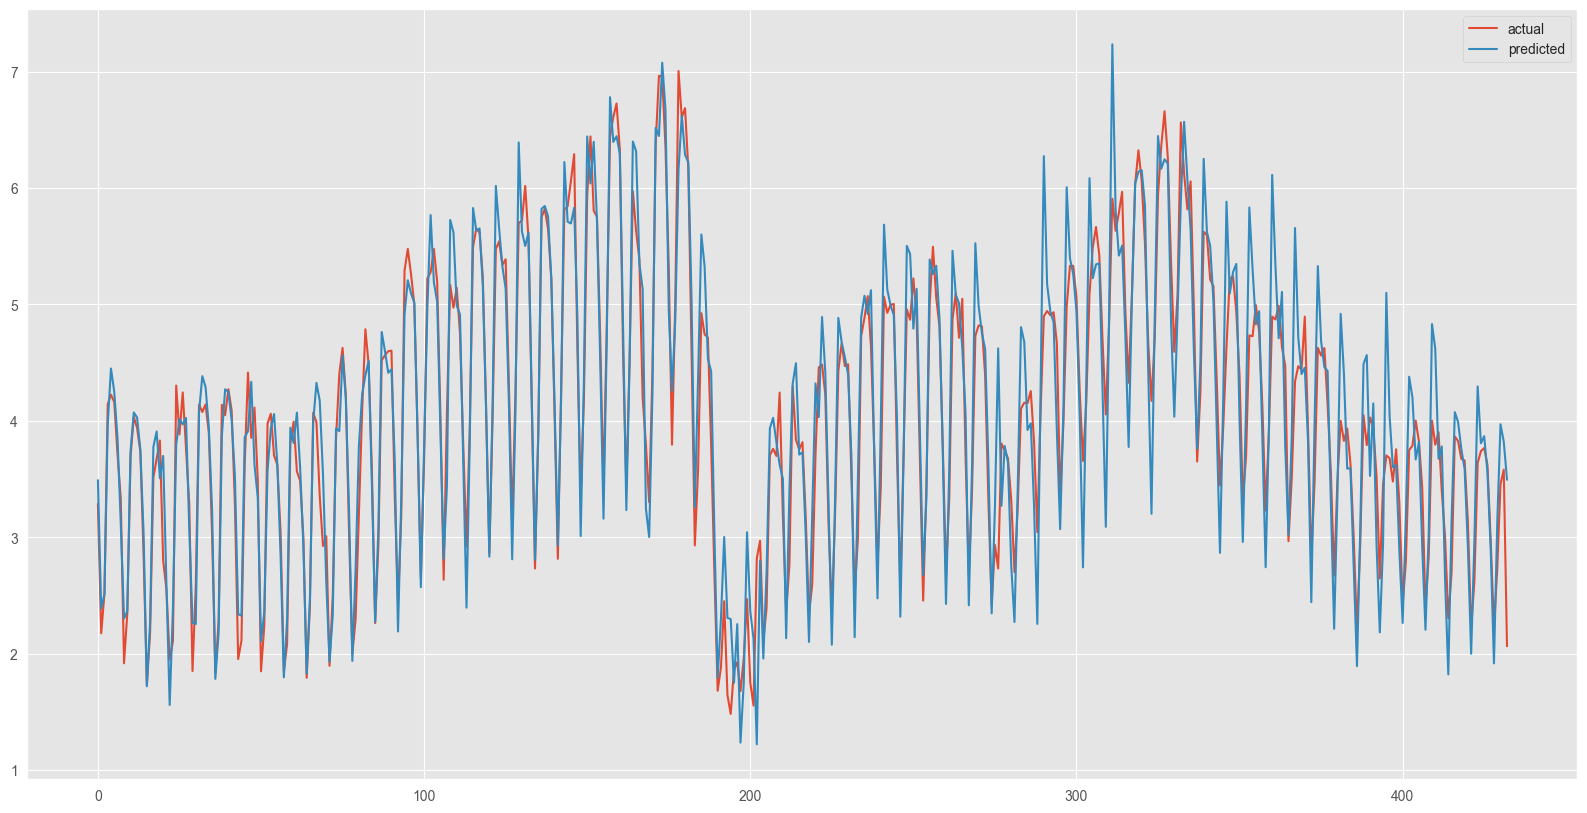

In [40]:
show_time_series_predicts(y_test, predict)

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of estimators (`n_estimators`) for the XGBoost model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `n_estimators` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the XGBoost Hyperparameter
Experiment with various values for `n_estimators` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `n_estimators` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.